In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/lankenau/isotools/src')

In [3]:
import os
import logging
from isotools import Transcriptome
from isotools import __version__ as isotools_version
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# set up logging
logging.basicConfig(format="%(levelname)s:%(message)s", level=logging.INFO)
logger = logging.getLogger("isotools")
logger.info(f"This is isotools version {isotools_version}")

INFO:This is isotools version 0.3.5rc11


In [4]:
basepath = '/project/hfa_work/ENCODE/code/snakemake-pipeline/'
version = 0
TISSUES = ["aorta", "brain", "colon", "heart", "lung", "muscle"]
path = os.path.join(basepath, "results/isotools_v{version}/pkl/{tissue}.pkl")
isoseqs = [Transcriptome.load(path.format(version=version, tissue=tissue)) for tissue in TISSUES]

INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/aorta.pkl


INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/brain.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/colon.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/heart.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/lung.pkl
INFO:loading transcriptome from /project/hfa_work/ENCODE/code/snakemake-pipeline/results/isotools_v0/pkl/muscle.pkl


In [5]:
classification = os.path.join(basepath, 'results/sqanti/isotools_v{version}/qc/{tissue}/{tissue}_classification.txt')
for tissue, isoseq in zip(TISSUES, isoseqs):
    isoseq.import_sqanti_classification(classification.format(version=version, tissue=tissue))

100%|██████████| 29984/29984 [00:11<00:00, 2501.88it/s]


In [6]:
for isoseq in isoseqs:
    isoseq.add_filter(tag='SQANTI_SUPPORT', expression='CAGE_SUPPORT and TSS_RATIO and POLYA_SITE and POLYA_MOTIF', context='transcript', update=True)

In [7]:
for i, isoseq in enumerate(isoseqs):
    count = 0
    for transcript in isoseq.iter_transcripts(query='SQANTI_SUPPORT'):
        count += 1
    print(TISSUES[i], count)

aorta 7149
brain 11645
colon 8862
heart 22153
lung 14023
muscle 7592


In [8]:
for i, isoseq in enumerate(isoseqs):
    count = 0
    for transcript in isoseq.iter_transcripts(query='FRAGMENT'):
        count += 1
    print(TISSUES[i], count)

aorta 40433
brain 36090
colon 37951
heart 143410
lung 71787
muscle 32254


In [9]:
coordination_results = isoseqs[4]['ENSG00000168484.13'].coordination_test(
    event_type=["TSS", "PAS"],
    min_total=10,
    min_alt_fraction=.01,
    transcript_filter="SQANTI_SUPPORT",
)
col_names = ("gene_id", "gene_name", "strand", "eventA_type", "eventB_type", "eventA_start", "eventA_end",
                 "eventB_start", "eventB_end", "pvalue", "statistic", "log2OR", "dcPSI_AB", "dcPSI_BA", "priA_priB", "priA_altB", "altA_priB",
                 "altA_altB", "priA_priB_transcript_ids", "priA_altB_transcript_ids", "altA_priB_transcript_ids", "altA_altB_transcript_ids")

res = pd.DataFrame(coordination_results, columns=col_names)
res

,gene_id,gene_name,strand,eventA_type,eventB_type,eventA_start,eventA_end,eventB_start,eventB_end,pvalue,...,dcPSI_AB,dcPSI_BA,priA_priB,priA_altB,altA_priB,altA_altB,priA_priB_transcript_ids,priA_altB_transcript_ids,altA_priB_transcript_ids,altA_altB_transcript_ids


In [20]:
coordination_results[1].columns

Index(['gene_id', 'gene_name', 'strand', 'eventA_type', 'eventB_type',
       'eventA_start', 'eventA_end', 'eventB_start', 'eventB_end', 'pvalue',
       'padj', 'statistic', 'log2OR', 'dcPSI_AB', 'dcPSI_BA', 'priA_priB',
       'priA_altB', 'altA_priB', 'altA_altB', 'priA_priB_transcript_ids',
       'priA_altB_transcript_ids', 'altA_priB_transcript_ids',
       'altA_altB_transcript_ids'],
      dtype='object')

In [33]:
coordination_results = [isoseq.coordination_test(
    event_type=["TSS", "PAS"],
    min_total=10,
    min_alt_fraction=.01,
    min_dist_AB=100,
    transcript_filter="SQANTI_SUPPORT",
) for isoseq in isoseqs]
coordination_results_sig = [c[c["padj"] < 0.05] for c in coordination_results]
coordination_results_sig[1]

,gene_id,gene_name,strand,eventA_type,eventB_type,eventA_start,eventA_end,eventB_start,eventB_end,pvalue,...,dcPSI_AB,dcPSI_BA,priA_priB,priA_altB,altA_priB,altA_altB,priA_priB_transcript_ids,priA_altB_transcript_ids,altA_priB_transcript_ids,altA_altB_transcript_ids
0,ENSG00000142875.21,PRKACB,+,TSS,PAS,84078084,84164341,84205294,84238491,6.468863e-05,...,0.800000,0.571429,28,0,2,5,[1],[],[0],"[3, 2]"
1,ENSG00000142875.21,PRKACB,+,TSS,PAS,84078084,84164694,84205294,84238491,2.317027e-13,...,0.518519,0.478632,28,0,2,24,[1],[],[0],[4]
2,ENSG00000117682.18,DHDDS,+,TSS,PAS,26432378,26432379,26442230,26471294,5.134018e-07,...,-0.833333,-0.166667,0,6,30,0,[],[1],[0],[]
4,ENSG00000154027.19,AK5,+,TSS,PAS,77281946,77282020,77323633,77559963,9.308567e-193,...,0.694680,0.716584,579,7,0,222,[2],[3],[],"[1, 5, 0]"
5,ENSG00000117152.14,RGS4,+,TSS,PAS,163068906,163069361,163076590,163076797,1.967077e-51,...,0.102210,0.102210,37,0,0,325,[0],[],[],[1]
11,ENSG00000095794.21,CREM,+,TSS,PAS,35126965,35127088,35179843,35212120,8.654818e-14,...,-0.632653,-0.367347,0,18,31,0,[],"[6, 7]","[1, 3]",[]
12,ENSG00000095794.21,CREM,+,TSS,PAS,35126965,35127088,35179843,35212460,9.181102e-03,...,-0.086083,-0.106952,0,18,10,23,[],"[6, 7]",[2],"[4, 5]"
13,ENSG00000095794.21,CREM,+,TSS,PAS,35126965,35127088,35212120,35212376,1.625389e-08,...,0.794872,0.794872,31,0,0,8,"[1, 3]",[],[],[0]
14,ENSG00000095794.21,CREM,+,TSS,PAS,35126965,35127088,35212120,35212460,6.846291e-10,...,0.484375,0.337595,31,0,10,23,"[1, 3]",[],[2],"[4, 5]"
16,ENSG00000095787.26,WAC,+,TSS,PAS,28532776,28533175,28620528,28620990,7.139287e-07,...,0.516827,0.516827,18,1,1,12,[1],[4],[0],"[3, 2, 5]"


coordination_results_unfiltered = [isoseq.coordination_test(
    event_type=["TSS", "PAS"],
) for isoseq in isoseqs]
coordination_results_unfiltered_sig = [c[c["padj"] < 0.05] for c in coordination_results_unfiltered]
coordination_results_unfiltered_sig[1]

([<matplotlib.axis.YTick at 0x7f84da5a21e0>,
 [Text(0, 0.5, 'pri'), Text(0, 1.5, 'alt')])

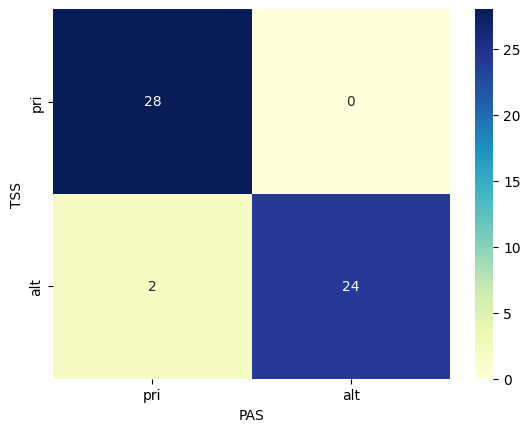

In [34]:
# Display a contingency table for a specific event
first_event = coordination_results_sig[1].iloc[1]
con_tab = [[first_event["priA_priB"], first_event["priA_altB"]], [first_event["altA_priB"], first_event["altA_altB"]]]
sns.heatmap(con_tab, annot=True, fmt="d", cmap="YlGnBu")
# Axis labels
plt.ylabel("TSS")
plt.xlabel("PAS")
# ticks
plt.xticks([0.5, 1.5], ["pri", "alt"])
plt.yticks([0.5, 1.5], ["pri", "alt"])

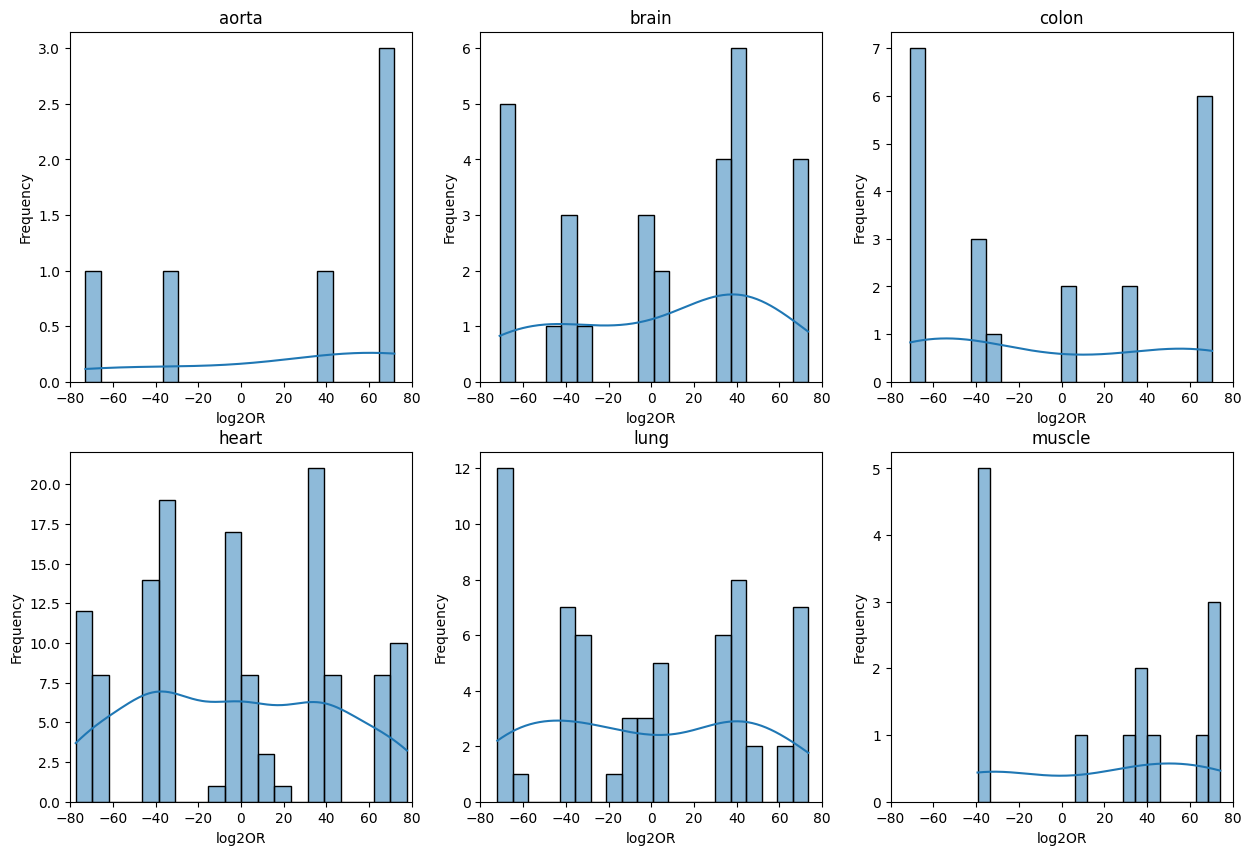

In [35]:
# 2x3 subplot grid of histograms
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    sns.histplot(coordination_results_sig[i]["log2OR"], bins=20, kde=True, ax=ax)
    # Limit x to -80 to 80
    ax.set_xlim(-80, 80)
    # Limit y to 0 to 80
    # ax.set_ylim(0, 80)
    ax.set_xlabel("log2OR")
    ax.set_ylabel("Frequency")
    ax.set_title(TISSUES[i])

In [36]:
# Taken from Carmine with minor adjustments
# https://github.com/carmineceraolo/splicing-coordination/blob/main/sheet05.ipynb
def volcano_plot(df,ax = None,sig=0.05,sigor=1.5,tag="(add a tag)",normalized=False):
    if ax is None:
        fig,ax = plt.subplots(figsize=(10,5))

    palette=sns.color_palette().as_hex()
    colors=[]

    for i,r in df.iterrows():
        if r.padj>=sig or abs(r.log2OR)<=sigor:
            colors.append(palette[7])
        else:
            colors.append(palette[0])

    x=np.array(df.log2OR)

    if normalized:
        sigor-=np.mean(x)
        sigor/=np.std(x)
        x-=np.mean(x)
        x/=np.std(x)

        y=np.array(df.padj)

        sig-=np.mean(y)
        sig/=np.std(y)

        y-=np.mean(y)
        y/=np.std(y)
        y=-np.log10(y)
        title=f"Normalized volcano plot of {tag}"
    else:
        y=np.array(-np.log10(np.where(df.padj == 0, sys.float_info.min, df.padj)))
        title=f"Volcano plot of {tag}"

    ax.scatter(x,y,c=colors)
    ax.axhline(y=-np.log10(sig),color="red",linestyle='dotted',label=f"padj = {sig}")
    ax.axvline(x=sigor,color="green",linestyle='dotted',label=f"log2OR threshold = {sigor}")
    ax.axvline(x=-sigor,color="green",linestyle='dotted')

    ax.set_xlim(-80,80)

    ax.set_title(title,fontsize=13+7)
    ax.set_ylabel("-log10(p_value)",fontsize=12)
    ax.set_xlabel("log2OR",fontsize=12)
    # ax.legend(frameon=True,fontsize=12)

In [37]:
coordination_results[1].loc[coordination_results[1].padj == 0]

,gene_id,gene_name,strand,eventA_type,eventB_type,eventA_start,eventA_end,eventB_start,eventB_end,pvalue,...,dcPSI_AB,dcPSI_BA,priA_priB,priA_altB,altA_priB,altA_altB,priA_priB_transcript_ids,priA_altB_transcript_ids,altA_priB_transcript_ids,altA_altB_transcript_ids


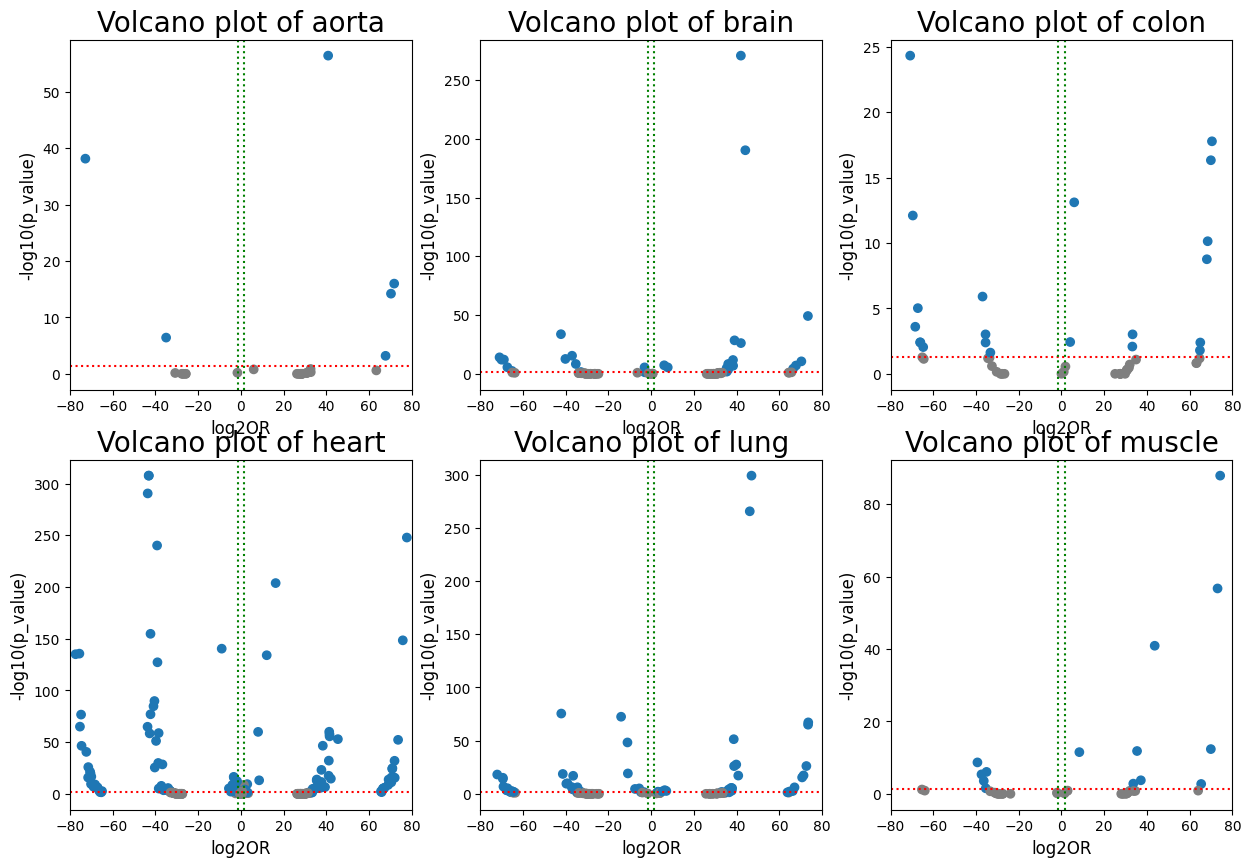

In [38]:
# 2x3 subplot grid of volcano plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    volcano_plot(coordination_results[i], ax=ax, tag=TISSUES[i])

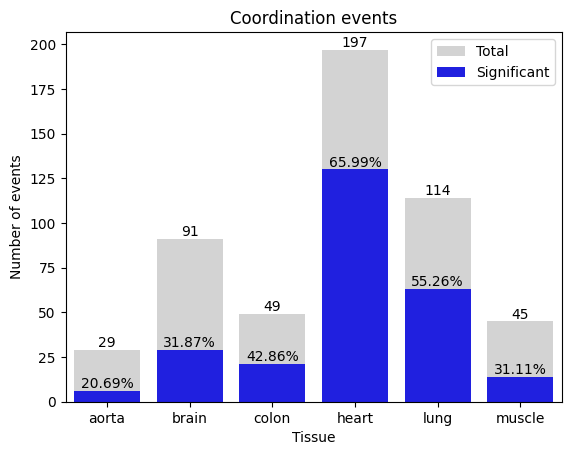

In [39]:
# Percentage of significant coordination
tmp = [[TISSUES[i], len(c[c["padj"] < 0.05]) / len(c), len(c[c["padj"] < 0.05]), len(c)] for i, c in enumerate(coordination_results)]
sig_coordination = pd.DataFrame(tmp, columns=["Tissue", "Percentage", "Significant", "Total"])

fig, ax = plt.subplots()
# stacked bar plot
ax1 = sns.barplot(data=sig_coordination, x="Tissue", y="Total", ax=ax, color="lightgrey", label="Total")
ax1.bar_label(ax1.containers[0], label_type='edge', fontsize=10)
ax2 = sns.barplot(data=sig_coordination, x="Tissue", y="Significant", ax=ax, color="blue", label="Significant")
ax2.bar_label(ax2.containers[1], label_type='edge', fontsize=10, labels=["{:.2f}%".format(i*100) for i in sig_coordination["Percentage"]])
# Bar labels
# for p in ax.patches:
#     ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_ylabel("Number of events")
plt.title("Coordination events")
plt.legend()

In [40]:
# List of gene_ids for each tissue with significant and total coordination, number of events split by positive and negative log2OR
# multi index with gene_id, total/significant, positive/negative
# series with counts



for i, c in enumerate(coordination_results):
    print(TISSUES[i])
    df = c[c["padj"] < 0.05]
    df["sign"] = np.where(df["log2OR"] > 0, "positive", "negative")
    print(df.groupby(["gene_id", "gene_name", "sign"]).size().sort_values(ascending=False))

aorta
gene_id             gene_name  sign    
ENSG00000038274.18  MAT2B      negative    1
ENSG00000049860.14  HEXB       positive    1
ENSG00000100591.8   AHSA1      positive    1
ENSG00000100664.11  EIF5       positive    1
ENSG00000159884.12  CCDC107    negative    1
ENSG00000204070.10  SYS1       positive    1
dtype: int64
brain
gene_id             gene_name        sign    
ENSG00000095794.21  CREM             negative    2
                                     positive    2
ENSG00000103202.13  NME4             positive    2
ENSG00000140416.26  TPM1             negative    2
ENSG00000142875.21  PRKACB           positive    2
ENSG00000103202.13  NME4             negative    1
ENSG00000100591.8   AHSA1            positive    1
ENSG00000095787.26  WAC              positive    1
ENSG00000109854.14  HTATIP2          positive    1
ENSG00000105993.15  DNAJB6           negative    1
ENSG00000117152.14  RGS4             positive    1
ENSG00000117682.18  DHDDS            negative    1
ENSG000

/scratch/local/ipykernel_48610/1019411564.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sign"] = np.where(df["log2OR"] > 0, "positive", "negative")
/scratch/local/ipykernel_48610/1019411564.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sign"] = np.where(df["log2OR"] > 0, "positive", "negative")
/scratch/local/ipykernel_48610/1019411564.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [41]:
# get all entries for ENSG00000168484.13 in lung
lung = coordination_results[4]
print(lung[lung["gene_id"] == "ENSG00000168484.13"])
# plot full contingency table of all TSS with all PAS
starts = list(set(lung.loc[lung["gene_id"] == "ENSG00000168484.13", ["eventA_start"]].values + lung.loc[lung["gene_id"] == "ENSG00000168484.13", ["eventA_end"]].values))
starts

Empty DataFrame
Columns: [gene_id, gene_name, strand, eventA_type, eventB_type, eventA_start, eventA_end, eventB_start, eventB_end, pvalue, padj, statistic, log2OR, dcPSI_AB, dcPSI_BA, priA_priB, priA_altB, altA_priB, altA_altB, priA_priB_transcript_ids, priA_altB_transcript_ids, altA_priB_transcript_ids, altA_altB_transcript_ids]
Index: []

[0 rows x 23 columns]


[]

In [47]:
grouped = []
for df in coordination_results:
    # Define significance threshold
    significance_threshold = 0.05

    # Define conditions
    all_events = df['log2OR'].notna()  # All rows
    significant_events = df['padj'] < significance_threshold
    positive_events = df['log2OR'] > 0
    negative_events = df['log2OR'] < 0
    neutral_events = df['log2OR'] == 0

    # Create new columns for the boolean conditions
    df['all_positive'] = all_events & positive_events
    df['all_negative'] = all_events & negative_events
    df['all_neutral'] = all_events & neutral_events
    df['significant_positive'] = significant_events & positive_events
    df['significant_negative'] = significant_events & negative_events
    df['significant_neutral'] = significant_events & neutral_events

    # Group by 'gene_id' and 'gene_name', and aggregate the counts
    counts_df = df.groupby(['gene_id', 'gene_name']).agg(
        all_positive=('all_positive', 'sum'),
        all_negative=('all_negative', 'sum'),
        all_neutral=('all_neutral', 'sum'),
        significant_positive=('significant_positive', 'sum'),
        significant_negative=('significant_negative', 'sum'),
        significant_neutral=('significant_neutral', 'sum')
    )
    # Create MultiIndex for columns
    counts_df.columns = pd.MultiIndex.from_tuples([
        ('all', 'positive'),
        ('all', 'negative'),
        ('all', 'neutral'),
        ('significant', 'positive'),
        ('significant', 'negative'),
        ('significant', 'neutral')
    ], names=['padj', 'log2OR'])

    # Output the result DataFrame with MultiIndex columns
    grouped.append(counts_df)
grouped[3]

padj                                    all                  significant  \
log2OR                             positive negative neutral    positive   
gene_id            gene_name                                               
ENSG00000003402.21 CFLAR                  1       10       0           0   
ENSG00000049759.20 NEDD4L                 0        1       0           0   
ENSG00000051620.11 HEBP2                  1        0       0           1   
ENSG00000058668.16 ATP2B4                 1        0       0           1   
ENSG00000060642.12 PIGV                   0        1       0           0   
...                                     ...      ...     ...         ...   
ENSG00000234456.10 MAGI2-AS3              0        2       0           0   
ENSG00000235535.9  TRDN-AS1               1        1       0           1   
ENSG00000237188.5  ENSG00000237188        2        0       0           2   
ENSG00000241135.8  LINC00881              1        0       0           1   
ENSG00000259030.8  FPGT-TNNI3K            4        2       0           3   

padj                                                 
log2OR                             negative neutral  
gene_id            gene_name                         
ENSG00000003402.21 CFLAR                  8       0  
ENSG00000049759.20 NEDD4L                 1       0  
ENSG00000051620.11 HEBP2                  0       0  
ENSG00000058668.16 ATP2B4                 0       0  
ENSG00000060642.12 PIGV                   0       0  
...                                     ...     ...  
ENSG00000234456.10 MAGI2-AS3              0       0  
ENSG00000235535.9  TRDN-AS1               0       0  
ENSG00000237188.5  ENSG00000237188        0       0  
ENSG00000241135.8  LINC00881              0       0  
ENSG00000259030.8  FPGT-TNNI3K            2       0  

[105 rows x 6 columns]

In [44]:
# get splice_graph of ENSG00000117682.18 in brain
brain = isoseqs[1]
sg = brain['ENSG00000117682.18'].segment_graph_filtered(query='SQANTI_SUPPORT')
sg._graph

[(26432378, 26432379, {}, {0: 1}),
 (26432379, 26432518, {0: 0}, {0: 3, 1: 2}),
 (26432518, 26432890, {1: 1}, {1: 3}),
 (26432890, 26433008, {0: 1, 1: 2}, {0: 4, 1: 4}),
 (26438167, 26438284, {0: 3, 1: 3}, {0: 6, 1: 5}),
 (26441598, np.int64(26442230), {1: 4}, {}),
 (26442730, 26442873, {0: 4}, {0: 7}),
 (26446315, 26446432, {0: 6}, {0: 8}),
 (26447558, 26447660, {0: 7}, {0: 9}),
 (26457790, 26457905, {0: 8}, {0: 10}),
 (26460036, 26460144, {0: 9}, {0: 11}),
 (26468894, np.int64(26471294), {0: 10}, {})]